In [4]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target
print(boston.keys())
boston.feature_names

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
df = pd.DataFrame(X,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df['MEDVPrice'] = pd.DataFrame(y, columns=['MEDVPrice'])
indexNames = df[ (df['MEDVPrice'] == 50)&(df['ZN'] == 0)].index
df.drop(indexNames , inplace=True)
X = df.iloc[:, 0:13]
y = df.iloc[:,-1]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y)
plt.axvline(y.median(), color='red')
plt.axvline(y.mean(), color='green', linestyle='dashed', linewidth=2)
plt.savefig('Ndis.jpg')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


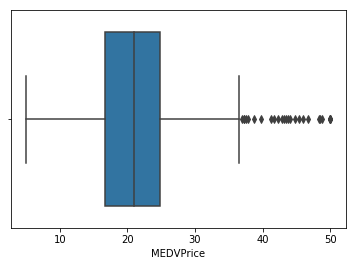

In [7]:
sns.boxplot(y, data=df)
plt.savefig('boxplot_MEDV.jpg')
plt.show()

In [15]:
a = df.MEDVPrice
print(a.describe())
import scipy.stats as stats
pv1=stats.normaltest(a)
pv2=stats.describe(a)
print(pv1,pv2)
print(a.median())

count    495.000000
mean      21.922424
std        8.324512
min        5.000000
25%       16.750000
50%       21.000000
75%       24.800000
max       50.000000
Name: MEDVPrice, dtype: float64
NormaltestResult(statistic=73.20020021909556, pvalue=1.2728536882378637e-16) DescribeResult(nobs=495, minmax=(5.0, 50.0), mean=21.922424242424242, variance=69.29749208686052, skewness=0.943022232758062, kurtosis=1.4064252500412904)
21.0


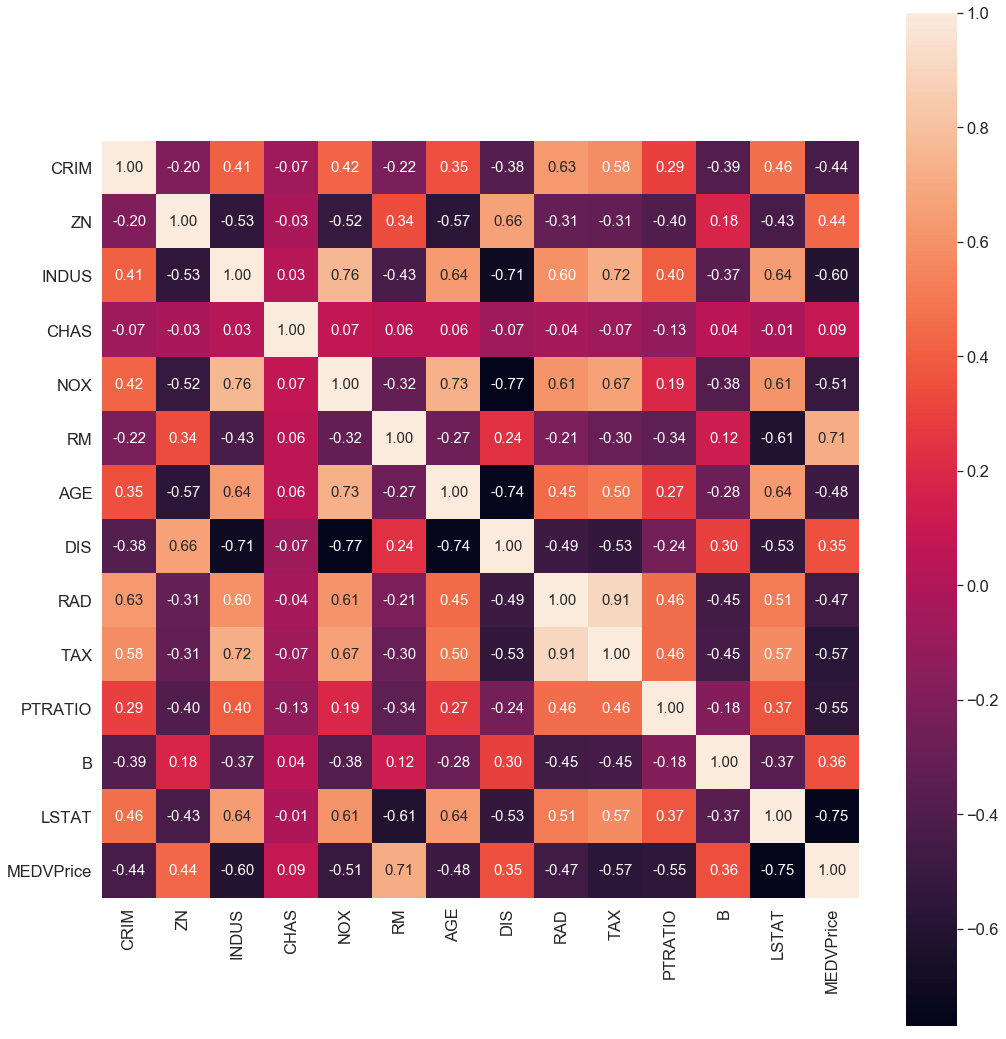

In [9]:
## Visualizing the important characteristics of a dataset

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,15))
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDVPrice']

cm = np.corrcoef(df[cols].values.T) # Corr Matrix
sns.set(font_scale=1.5)
hm = sns.heatmap(cm
                 ,cbar=True
                 ,annot=True
                 ,square=True
                 ,fmt='.2f'
                 ,annot_kws={'size': 15}
                 ,yticklabels=cols
                 ,xticklabels=cols)

plt.tight_layout()
plt.savefig('heatmap.jpg') # 必須要放在 plt.show() 之前
plt.show()

In [10]:
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDVPrice    0
dtype: int64

# train_test_spilt

In [11]:
#train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)

print('training sample=', X_train.shape[0])
print('test sample=', X_test.shape[0])

training sample= 397
test sample= 98


# SelectFromModel

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#標準化
X_std = StandardScaler().fit_transform(X_train)
X_std_test = StandardScaler().fit_transform(X_test)

In [10]:
selector = SelectFromModel(estimator=LinearRegression()).fit(X_std, y_train)
boston.feature_names[selector.get_support()]

array(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='<U7')

In [11]:
selector.threshold_

1.4927068779987755

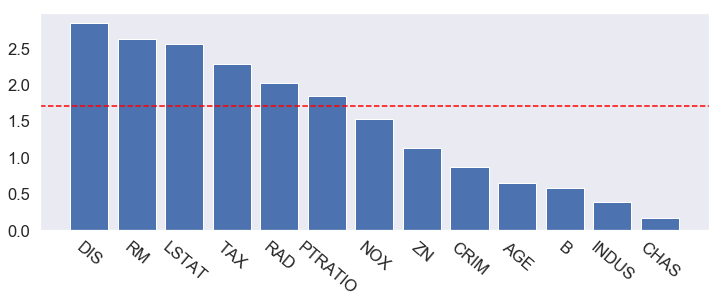

,coef,feature
7,2.843252,DIS
5,2.615002,RM
12,2.546627,LSTAT
9,2.277917,TAX
8,2.017195,RAD
10,1.837315,PTRATIO
4,1.520778,NOX
1,1.118167,ZN
0,0.867687,CRIM
6,0.645594,AGE


In [12]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
# 使用DateFrame方式進行排序
feature_sort = pd.DataFrame( abs(selector.estimator_.coef_), columns=['coef'])
feature_sort['feature'] = feature_names
feature_sort = feature_sort.sort_values(by='coef', ascending=False)
# 畫圖 從高到低 去畫出 特徵重要性
plt.figure(figsize=(12, 4))
plt.bar(feature_sort['feature'] , feature_sort['coef'])
plt.xticks(rotation=-40)
plt.axhline(1.6950345655365453, color='red', linestyle='dashed')
plt.grid()
plt.savefig('coef_sort.jpg')
plt.show()
feature_sort

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


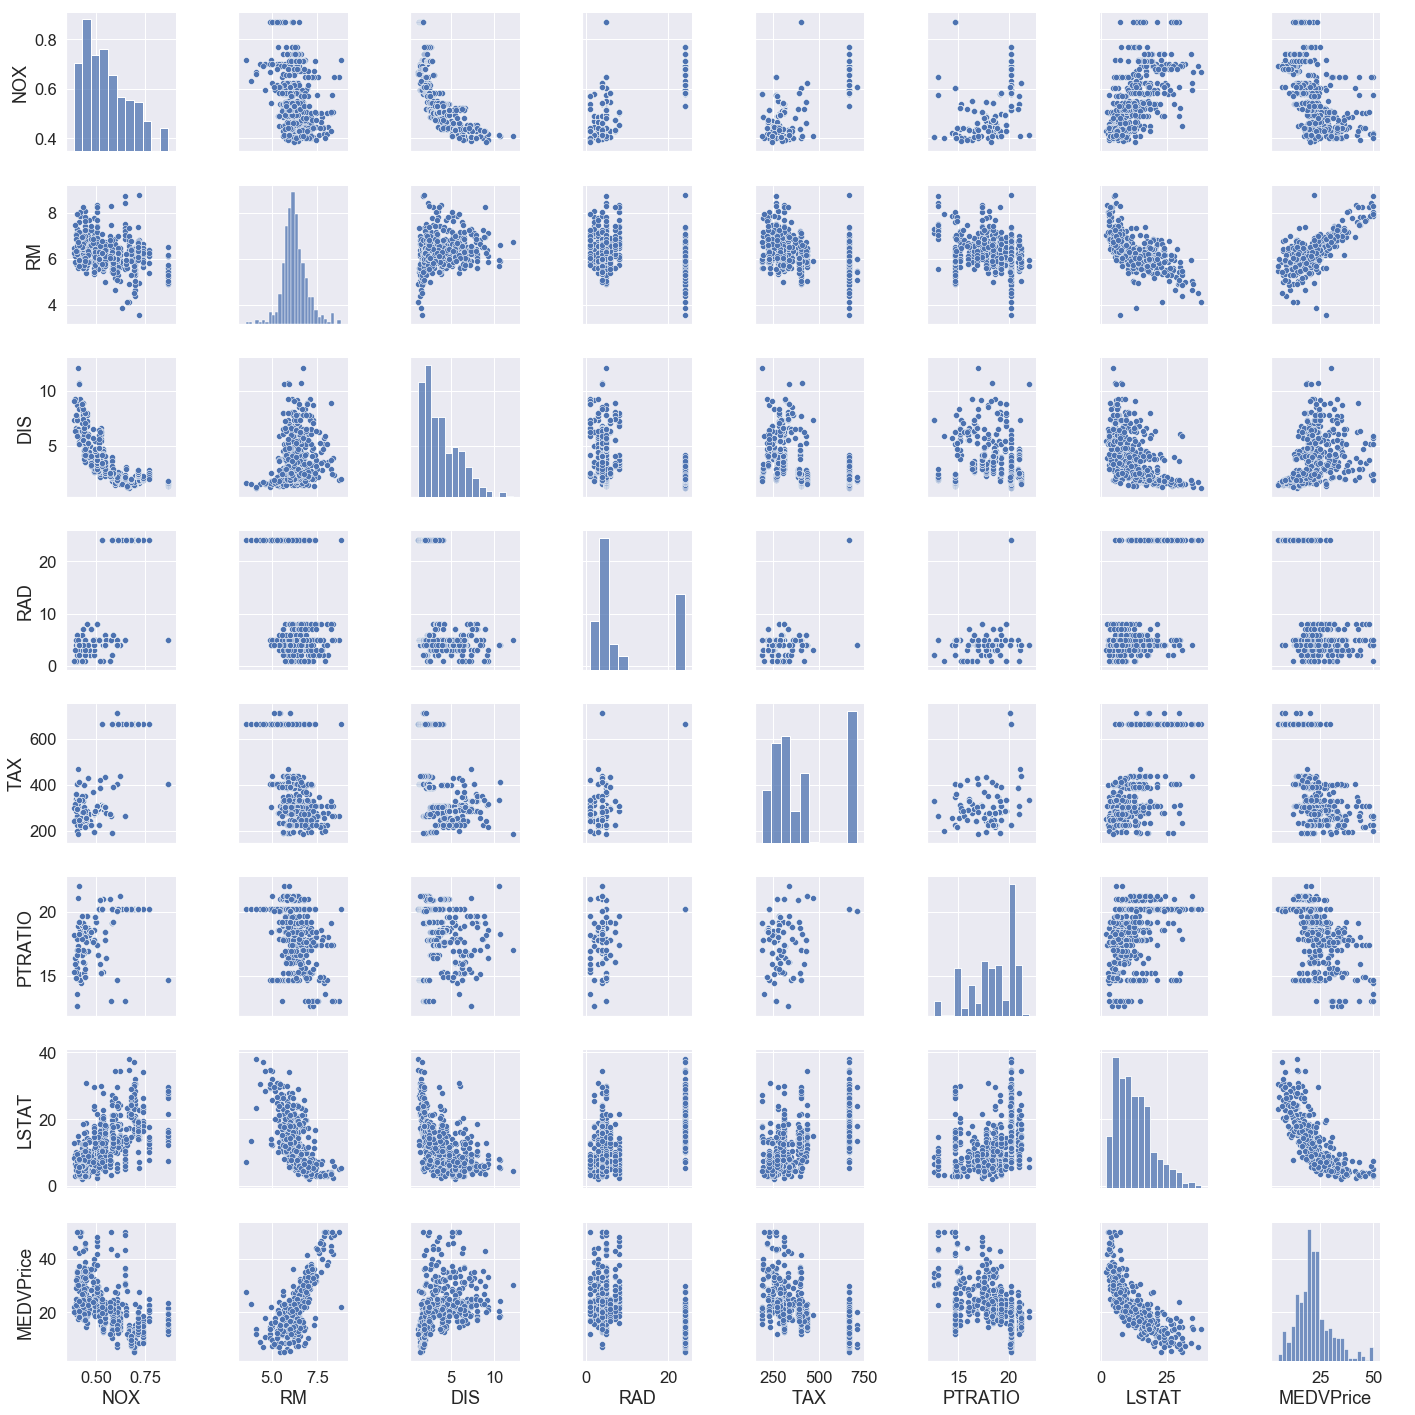

In [13]:
cols = ['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDVPrice']
sns.set(font_scale=1.5)# 字體大些
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.savefig('pairplot.jpg')
plt.show()

In [14]:
#建立模型
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)

cols=['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
new_X_train = X_train.loc[:,cols]
new_X_train['LSTAT_square'] = quadratic.fit_transform(new_X_train[['LSTAT']])[:,2]
new_X_test = X_test.loc[:,cols]
new_X_test['LSTAT_square'] = quadratic.fit_transform(new_X_test[['LSTAT']])[:,2]
p = len(cols)+1

lm.fit(new_X_train, y_train)
print('slope=', lm.coef_)
print('intercept=', lm.intercept_)
np.set_printoptions(suppress=True)
lm.coef_

r2_test = lm.score(new_X_test, y_test)
print('The R-square for test is: ', r2_test )
Adj_R2 = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p -1)) )
print('The Adjusted R^2 for test is: ' + str(Adj_R2))


#預測
Y_test_hat = lm.predict(new_X_test)
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', 
      mean_squared_error(y_test, Y_test_hat))

slope= [-1.34308817e+01  3.35481904e+00 -8.85833711e-01  1.45939724e-01
 -1.20145108e-02 -8.73290445e-01 -1.24648310e+00  2.24961257e-02]
intercept= 42.59428466641875
The R-square for test is:  0.7776731257767557
The Adjusted R^2 for test is: 0.7576886876443293
The mean square error of price and predicted value using multifit is:  15.999356028212294


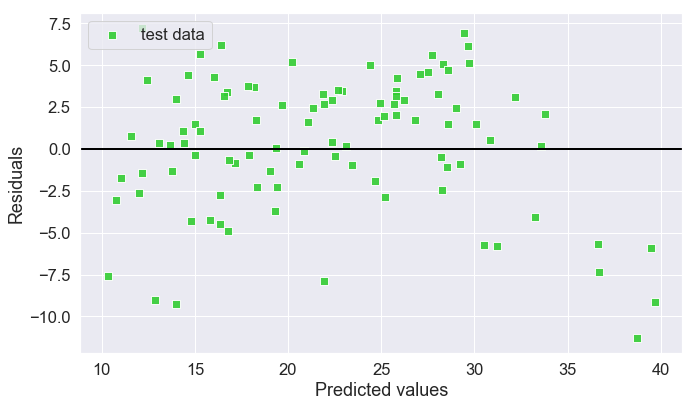

In [15]:
#殘差圖
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_hat,  
            Y_test_hat - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')#alpha=透明度

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()
plt.savefig('select_residuals.jpg')
plt.show()

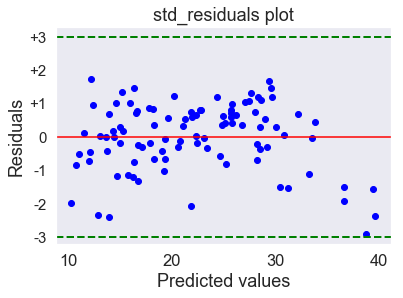

In [16]:
#標準化殘差圖
from sklearn import preprocessing
residuals = Y_test_hat-y_test
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_test_hat, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15)
plt.grid()
plt.savefig('select_residuals_std.jpg')
plt.show()

# RFE

In [17]:
from sklearn.feature_selection import RFE
import sklearn
n_features_optimal = 1

lm = LinearRegression()
lm.fit(X_std, y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(X_std, y_train)
print(rfe)
# RFE?

RFE(estimator=LinearRegression(), n_features_to_select=1)


In [18]:
a = pd.DataFrame(rfe.ranking_ , boston.feature_names ,columns=['rank']).sort_values(by='rank')
a

,rank
LSTAT,1
RM,2
PTRATIO,3
NOX,4
DIS,5
TAX,6
RAD,7
ZN,8
CRIM,9
AGE,10


In [19]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)

cols=['LSTAT', 'RM', 'PTRATIO','DIS', 'NOX']
p = len(cols)

new_X_train_rfe = X_train.loc[:,cols]
new_X_train_rfe['LSTAT_square'] = quadratic.fit_transform(new_X_train[['LSTAT']])[:,2]
new_X_test_rfe = X_test.loc[:,cols]
new_X_test_rfe['LSTAT_square'] = quadratic.fit_transform(new_X_test[['LSTAT']])[:,2]

lm.fit(new_X_train_rfe, y_train)
print('intercept=', lm.intercept_)
print('slope=', lm.coef_)

r2_2 = lm.score(new_X_test_rfe, y_test)
print('The R-square for test is: ', r2_2 )
Adj_R2_2 = 1 - ((1 - r2_2) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p -1)) )
print('The Adjusted R^2 for test is: ' + str(Adj_R2_2))

#預測
Y_hat_2 = lm.predict(new_X_test_rfe)
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', 
      mean_squared_error(y_test, Y_hat_2))

intercept= 43.50602499368788
slope= [ -1.2819046    3.37606075  -0.9694682   -0.90784582 -17.56363238
   0.02292815]
The R-square for test is:  0.7652593329851407
The Adjusted R^2 for test is: 0.752501688038681
The mean square error of price and predicted value using multifit is:  16.892692433122445


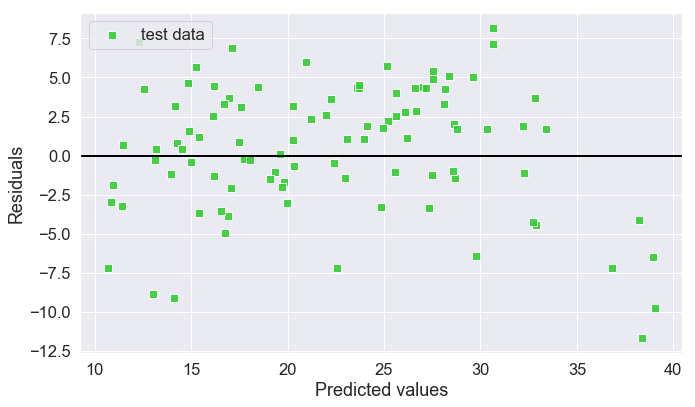

In [20]:
#殘差圖
plt.figure(figsize=(10, 6))
plt.scatter(Y_hat_2 ,  
            Y_hat_2  - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')#alpha=透明度

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

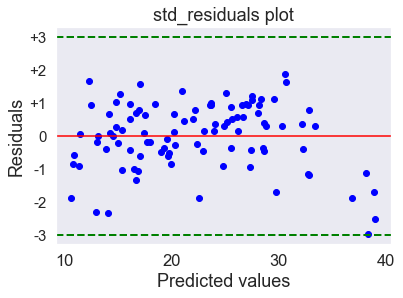

In [21]:
#標準化殘差圖
from sklearn import preprocessing
residuals = Y_hat_2-y_test
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15)
plt.grid()
plt.show()